# 1- Introducción al algoritmo K-Nearest Neighbours (kNN)

Primero, discutiremos y explicaremos el algoritmo kNN y los conceptos más importantes relacionados con este. ¿Estás listo?

En el aprendizaje automático, el algoritmo kNN es uno de los más fáciles y simples, si no el más fácil de todos. kNN es un algoritmo supervisado y no paramétrico, lo que significa que no se requiere ninguna suposición sobre la distribución de los datos.

El algoritmo kNN se utiliza tanto para tareas de clasificación como de regresión, y en ambos casos se basa en el número (k) de ejemplos de entrenamiento más cercanos en el espacio de características.

- **Para tareas de regresión**: La salida es simplemente un valor asociado a la propiedad del objeto. Este valor es el promedio de los valores de los k vecinos más cercanos.
- **Para tareas de clasificación**: La salida es simplemente la pertenencia a una clase. El punto de datos dado se clasifica según la mayoría de los tipos de sus vecinos. El punto de datos se asigna a la clase más frecuente entre sus k vecinos más cercanos. Por lo general, k es un número entero positivo pequeño. Si k=1, entonces el punto de datos se asigna directamente a la clase de su vecino más cercano.

El algoritmo kNN es un "aprendiz perezoso" (lazy learner), lo que significa que no genera un modelo a partir de los datos de entrenamiento. Todos los datos de entrenamiento se utilizan en la fase de prueba. Esto implica que el entrenamiento es más rápido, pero las predicciones son más lentas.

# 2- Intuición

El algoritmo kNN es sencillo de entender. Simplemente calcula la distancia entre un punto de datos de muestra y todos los demás puntos de datos de entrenamiento. La distancia puede ser la distancia Euclidiana o la distancia Manhattan. Luego, se elige el número de vecinos (K), donde K puede ser cualquier número entero. Finalmente, el algoritmo asigna el punto de datos de muestra a la clase a la que pertenece la mayoría de los k puntos más cercanos.

Ahora, tomemos un ejemplo simple. Supongamos que tenemos un conjunto de datos con dos variables clasificadas como Rojo y Azul.

En el algoritmo kNN, el valor de K representa el número de vecinos más cercanos. Generalmente, el valor de K es impar porque ayuda a decidir la mayoría de la clase.

Supongamos que queremos clasificar un nuevo punto de datos \( X \) como perteneciente a la clase Azul o Roja. Supongamos que el valor de K es 3. El algoritmo kNN comienza calculando la distancia entre \( X \) y todos los demás puntos de datos. Luego, encuentra los 3 puntos más cercanos con la menor distancia al punto \( X \).

En el paso final del algoritmo kNN, asignamos el nuevo punto de datos \( X \) a la clase mayoritaria entre los 3 puntos más cercanos. Si 2 de los 3 puntos más cercanos pertenecen a la clase Roja, mientras que 1 pertenece a la clase Azul, entonces clasificamos el nuevo punto de datos como Rojo.

# 3. Cómo decidir el número de vecinos en kNN

Ahora, después de discutir y simplificar el algoritmo, surge una pregunta importante: ¿Cómo podemos decidir el número de vecinos \( K \) para obtener la mayor precisión?

El número de vecinos \( K \) en kNN es un parámetro que debemos seleccionar al momento de construir el modelo. Elegir el valor óptimo de \( K \) en kNN es el problema más crítico. Un valor pequeño de \( K \) significa que el ruido tendrá una mayor influencia en el resultado, lo que aumenta significativamente la probabilidad de sobreajuste. Por otro lado, un valor grande de \( K \) hace que el modelo kNN sea computacionalmente más costoso en términos de tiempo. Además, un valor grande de \( K \) generará un límite de decisión más suave, lo que implica una menor varianza pero un mayor sesgo.

Podemos aplicar el método del codo para seleccionar el valor de \( K \). Para optimizar los resultados, podemos utilizar la técnica de validación cruzada. Con la validación cruzada, podemos probar el algoritmo kNN con diferentes valores de \( K \). El modelo que proporcione una buena precisión puede considerarse una elección óptima. Esto depende de cada caso individual y, en ocasiones, el mejor enfoque es probar todos los posibles valores de \( K \) y evaluar los resultados.

# 4- Aprendizaje Ansioso (Eager Learning) y Aprendizaje Perezoso (Lazy Learning)

Lo último que discutiremos sobre los K Vecinos Más Cercanos es la diferencia entre el **Eager Learning** y el **Lazy Learning**.

- **Eager Learning**:  
  En este enfoque, cuando se proporcionan puntos de datos de entrenamiento, se construye un modelo generalizado antes de realizar predicciones sobre nuevos puntos para clasificarlos. Podemos pensar en estos aprendices como listos, activos y ansiosos por clasificar nuevos puntos de datos.


- **Lazy Learning**:  
  En este caso, no es necesario entrenar o aprender un modelo; todos los puntos de datos se utilizan en el momento de la predicción. Los aprendices perezosos esperan hasta el último momento antes de clasificar cualquier punto de datos.

# 5- Importamos librerías 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 6- Importamos Dataset

In [2]:
Data = pd.read_csv("breast-cancer-wisconsin.txt")

# 7. EDA

In [3]:
Data.shape

(698, 11)

In [4]:
Data.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


Podemos ver que el nombre de las columnas no es útil. Deberíamos usar nombres de columnas significativos.

In [5]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

Data.columns = col_names

Data.columns

Index(['Id', 'Clump_thickness', 'Uniformity_Cell_Size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

Ahora, los nombres de las columnas son significativos.

In [6]:
Data.head()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


Eliminar columnas innecesarias, como la columna de ID.

In [7]:
Data.drop('Id',axis = 1,inplace=True)
Data.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4


In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              698 non-null    int64 
 1   Uniformity_Cell_Size         698 non-null    int64 
 2   Uniformity_Cell_Shape        698 non-null    int64 
 3   Marginal_Adhesion            698 non-null    int64 
 4   Single_Epithelial_Cell_Size  698 non-null    int64 
 5   Bare_Nuclei                  698 non-null    object
 6   Bland_Chromatin              698 non-null    int64 
 7   Normal_Nucleoli              698 non-null    int64 
 8   Mitoses                      698 non-null    int64 
 9   Class                        698 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


1- No hay valores faltantes, pero lo verificaremos más tarde.

2- Hay 1 variable categórica y 9 variables numéricas.

### Verificar la frecuencia de la distribución para todas las columnas.

In [9]:
for var in Data.columns:
    
    print(Data[var].value_counts())

1     145
5     129
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: Clump_thickness, dtype: int64
1     383
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: Uniformity_Cell_Size, dtype: int64
1     352
2      59
10     58
3      56
4      44
5      34
7      30
6      30
8      28
9       7
Name: Uniformity_Cell_Shape, dtype: int64
1     406
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: Marginal_Adhesion, dtype: int64
2     385
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: Single_Epithelial_Cell_Size, dtype: int64
1     401
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64
2     166
3     164
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6      10
Name: Bland_Chromatin, dtype: int64
1     442
10     

Nota: La frecuencia de Bare_Nuclei es un número entero. Por lo tanto, necesitamos convertir el tipo de dato de Bare_Nuclei a numérico.

In [10]:
Data['Bare_Nuclei'] = pd.to_numeric(Data['Bare_Nuclei'], errors='coerce')

Ahora, verifica el tipo de dato de las columnas.

In [11]:
Data.dtypes

Clump_thickness                  int64
Uniformity_Cell_Size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

### Resumen  
1- Todas las columnas en los datos son numéricas.  

2- Hay 10 variables, 9 son variables de características y (Class) es la variable objetivo.

## Check de valores faltantes

In [12]:
Data.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

Hay valores faltantes en la variable (Bare_Nuclei) en 16 filas.

Necesitamos profundizar en la frecuencia de Bare_Nuclei.

In [14]:
# check frequency distribution of `Bare_Nuclei` column
Data['Bare_Nuclei'].value_counts()

1.0     401
10.0    132
5.0      30
2.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: Bare_Nuclei, dtype: int64

In [15]:
# check unique values in `Bare_Nuclei` column

Data['Bare_Nuclei'].unique()

array([10.,  2.,  4.,  1.,  3.,  9.,  7., nan,  5.,  8.,  6.])

check frequency distribution of target variable Class


In [16]:
Data['Class'].value_counts()

2    457
4    241
Name: Class, dtype: int64

En la columna Class contiene 2 valores: 2 y 4.

- El valor 2 se refiere al cáncer benigno y el valor 4 se refiere al cáncer maligno.

# 8. Data Visualization

Arriba, tenemos una comprensión básica de los datos. Ahora, complementaremos con algunas visualizaciones de datos para obtener más información.

### Checking the distribution of data.

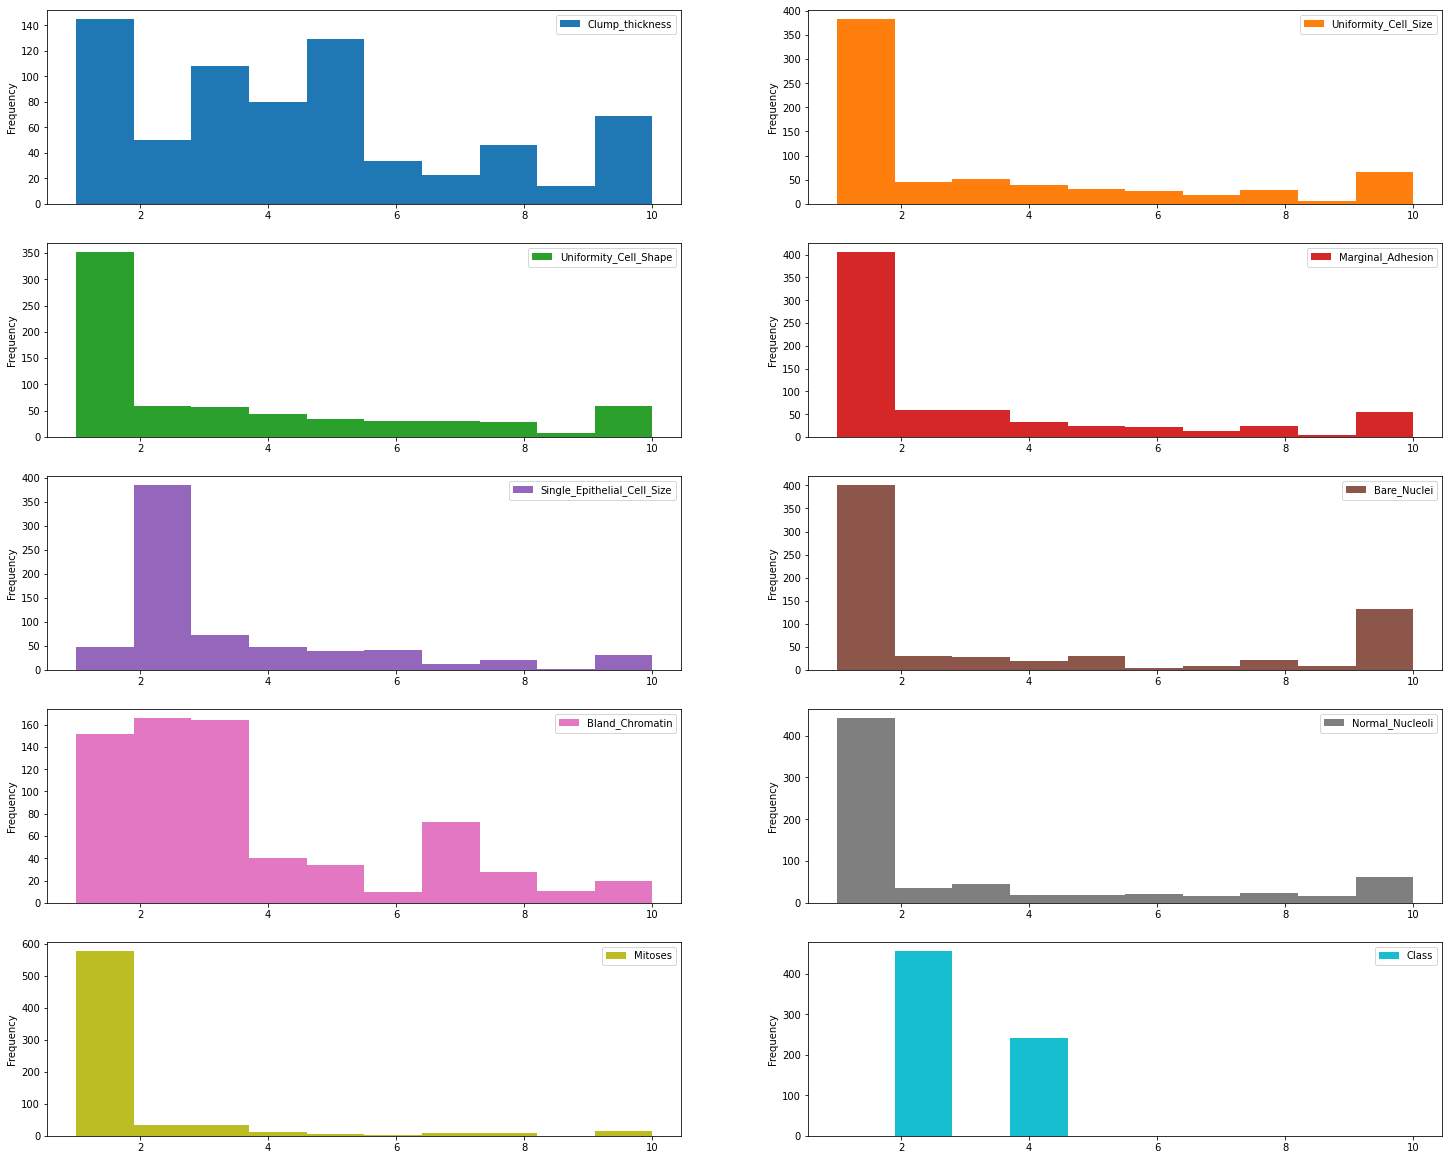

In [17]:
# plot histogram of the variable

plt.rcParams['figure.figsize']=(25,25)
Data.plot(kind='hist', bins=10, subplots=True, layout=(6,2), sharex=False, sharey=False)
plt.show()

Podemos ver que la mayoría de las variables, como (Bare_Nuclei, Mitoses, etc.), están sesgadas positivamente.

## Estimación del coeficiente de correlación  
-> Podemos calcular el coeficiente de correlación (r de Pearson) entre pares de atributos.

-> El coeficiente de correlación varía entre -1 y 1.

-> Cuando está entre 0 y +1, significa que la correlación es positiva; cuando está cerca de +1, significa que la correlación es fuertemente positiva.

-> Cuando está entre 0 y -1, significa que la correlación es negativa; cuando está cerca de -1, significa que la correlación es fuertemente negativa.

-> Cuando el valor es 0, significa que no hay correlación entre los atributos.

In [17]:
Correlation = Data.corr()

In [18]:
Correlation['Class'].sort_values(ascending = False)

Class                          1.000000
Bare_Nuclei                    0.822563
Uniformity_Cell_Shape          0.818794
Uniformity_Cell_Size           0.817772
Bland_Chromatin                0.756732
Clump_thickness                0.716509
Normal_Nucleoli                0.712067
Marginal_Adhesion              0.696605
Single_Epithelial_Cell_Size    0.682618
Mitoses                        0.423008
Name: Class, dtype: float64

. All attributes is positive correlation ,but some attributes like (Bare_Nuclei ,Uniformity_Cell_Shape, Uniformity_Cell_Size) is strong positive attributes.

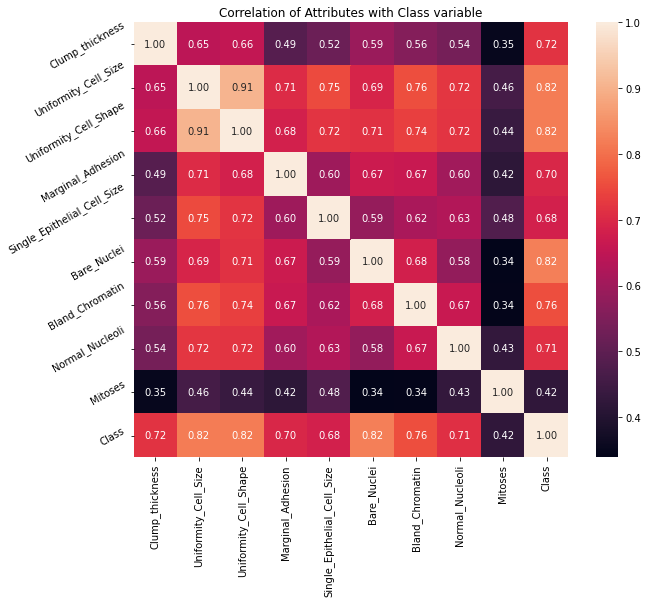

In [19]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(Correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

# 9. Declare feature vector and target variable 

In [20]:
X = Data.drop(['Class'], axis=1)

y = Data['Class']

# 10. Split data into separate training and test set 


In [21]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [22]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((558, 9), (140, 9))

# 11- Feature Enginnering

In [23]:
# check data types in X_train

X_train.dtypes

Clump_thickness                  int64
Uniformity_Cell_Size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
dtype: object

Engineering missing values in variables


In [24]:
X_train.isna().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    15
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
dtype: int64

In [25]:
X_test.isna().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    1
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

Existen dos métodos que se pueden utilizar para imputar valores faltantes. Uno es la imputación por media o mediana y el otro es la imputación por muestra aleatoria. Cuando hay valores atípicos en el conjunto de datos, debemos usar la imputación por mediana. Por lo tanto, utilizaré la imputación por mediana, ya que es más resistente a los valores atípicos.

Imputaré los valores faltantes con las medidas estadísticas apropiadas de los datos, en este caso la mediana. La imputación debe realizarse sobre el conjunto de entrenamiento y luego propagarse al conjunto de prueba. Esto significa que las medidas estadísticas que se utilizarán para llenar los valores faltantes, tanto en el conjunto de entrenamiento como en el de prueba, deben extraerse solo del conjunto de entrenamiento. Esto se hace para evitar el sobreajuste.

In [26]:
# impute missing values in X_train and X_test with respective column median in X_train

for df1 in [X_train, X_test]:
    for col in X_train.columns:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)   

/home/cdsw/.conda/envs/seguros_env2/lib/python3.6/site-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [27]:
X_train.isna().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [28]:
X_test.isna().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

Ahora, los datos de entrenamiento y prueba están listos para la construcción del modelo. Antes de eso, mapeemos todos los datos de entrenamiento y prueba a la misma escala.

# 12- Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
cols = X_train.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [31]:
X_train.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,0.574621,-0.040143,0.277515,-0.629622,0.775913,-0.384119,-0.171342,1.983330,-0.333601
1,-0.497748,-0.680143,-0.721540,-0.629622,-0.549473,-0.661042,-0.171342,-0.601658,-0.333601
2,0.932077,1.879857,0.277515,2.541854,2.984890,-0.107196,0.660039,0.044589,0.859663
3,0.932077,0.599857,0.943552,0.075150,-0.107678,1.277420,1.491419,0.367712,-0.333601
4,-0.855205,-0.680143,-0.721540,-0.629622,-0.549473,-0.661042,-1.002722,-0.601658,-0.333601


In [32]:
X_test.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,0.217164,-0.040143,-0.388522,1.837081,0.775913,1.831266,1.907109,-0.601658,0.263031
1,-0.497748,-0.680143,-0.721540,-0.629622,-0.549473,-0.661042,-0.587032,-0.601658,-0.333601
2,-0.140292,0.599857,0.610534,1.837081,1.217708,1.831266,2.738490,1.337083,-0.333601
3,-0.497748,-0.040143,0.943552,0.427537,0.775913,1.277420,0.244348,0.367712,-0.333601
4,-1.212661,-0.680143,-0.721540,-0.629622,-0.549473,-0.661042,-0.587032,-0.601658,-0.333601


# 13. Fit K Neighbours Classifier to the training Set

In [33]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)

# fit the model to the training set
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [34]:
y_pred = knn.predict(X_test)

El método `predict_proba` proporciona las probabilidades para la variable objetivo (2 y 4) en este caso, en formato de arreglo.

- 2 corresponde a la probabilidad de cáncer benigno.


- 4 corresponde a la probabilidad de cáncer maligno.

In [35]:
# probability of getting output as 2 - benign cancer

knn.predict_proba(X_test)[:,0]

array([0.        , 1.        , 0.        , 0.33333333, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.66666667, 1.        ,
       0.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       1.        , 1.        , 1.        , 0.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 0.33333333, 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 1.        , 0.        , 1.        , 1.     

In [36]:
# probability of getting output as 4 - benign cancer

knn.predict_proba(X_test)[:,1]

array([1.        , 0.        , 1.        , 0.66666667, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 1.        ,
       0.        , 1.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 1.        , 0.33333333, 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       1.        , 0.66666667, 1.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 1.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.     

# 15. Check accuracy score

In [37]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9714


- Aquí, **y_test** es la etiqueta de clase verdadera, mientras que **y_pred** es la predicción realizada por el modelo.


- Compara la precisión entre el conjunto de entrenamiento y el conjunto de prueba para verificar el sobreajuste.

In [38]:
y_pred_train = knn.predict(X_train)
print('Training Set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training Set accuracy score: 0.9803


In [39]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.9803
Test set score: 0.9714


* El puntaje de entrenamiento es 0.9821 y el puntaje del conjunto de prueba es 0.9714. Dado que ambos valores son bastante comparables, no hay sobreajuste.

* La precisión de 0.9714 es buena, pero comparemos esta precisión con la **precisión nula**.

* La **precisión nula** es la precisión que se podría lograr al predecir siempre la clase más frecuente.

In [40]:
# check class distribution in test set

y_test.value_counts()

2    85
4    55
Name: Class, dtype: int64

In [41]:
# check null accuracy score

null_accuracy = (85/(85+55))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.6071


Podemos ver que la precisión de nuestro modelo es 0.9714, pero la precisión nula es 0.6071. Por lo tanto, podemos concluir que nuestro modelo de K Vecinos Más Cercanos está haciendo un muy buen trabajo al predecir las etiquetas de clase.

# 16. Reconstruir el modelo de clasificación kNN utilizando diferentes valores de k.

Reconstruiré el modelo KNN con diferentes valores de K. Elegiré K=5.

In [42]:
# instantiate the model with k=5
knn_5 = KNeighborsClassifier(n_neighbors=5)

# fit the model to the training set
knn_5.fit(X_train, y_train)

# predict on the test-set
y_pred_5 = knn_5.predict(X_test)

print('Model accuracy score with k=5 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_5)))

Model accuracy score with k=5 : 0.9714


Reconstruir el modelo de clasificación kNN utilizando k=6.

In [43]:
# instantiate the model with k=6
knn_6 = KNeighborsClassifier(n_neighbors=6)

# fit the model to the training set
knn_6.fit(X_train, y_train)

# predict on the test-set
y_pred_6 = knn_6.predict(X_test)

print('Model accuracy score with k=6 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_6)))

Model accuracy score with k=6 : 0.9643


Rebuild kNN Classification model using k=7

In [44]:
# instantiate the model with k=7
knn_7 = KNeighborsClassifier(n_neighbors=7)

# fit the model to the training set
knn_7.fit(X_train, y_train)

# predict on the test-set
y_pred_7 = knn_7.predict(X_test)

print('Model accuracy score with k=7 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_7)))

Model accuracy score with k=7 : 0.9571


Rebuild kNN Classification model using k=8

In [45]:
# instantiate the model with k=8
knn_8 = KNeighborsClassifier(n_neighbors=8)

# fit the model to the training set
knn_8.fit(X_train, y_train)

# predict on the test-set
y_pred_8 = knn_8.predict(X_test)

print('Model accuracy score with k=8 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_8)))

Model accuracy score with k=8 : 0.9643


Rebuild kNN Classification model using k=9

In [46]:
# instantiate the model with k=9
knn_9 = KNeighborsClassifier(n_neighbors=9)

# fit the model to the training set
knn_9.fit(X_train, y_train)

# predict on the test-set
y_pred_9 = knn_9.predict(X_test)

print('Model accuracy score with k=9 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_9)))

Model accuracy score with k=9 : 0.9643


# Resultados Finales 

* In the original KNN model with k=3 the accuracy is 0.9714. when we increase the value of K to 5, we have the same accuracy.


* When we change the value of k =6,7,8, wet get accuracy score 0.9786. So, it results in performance improvement.


* But when we assign K=9, the score decrease to 0.9714